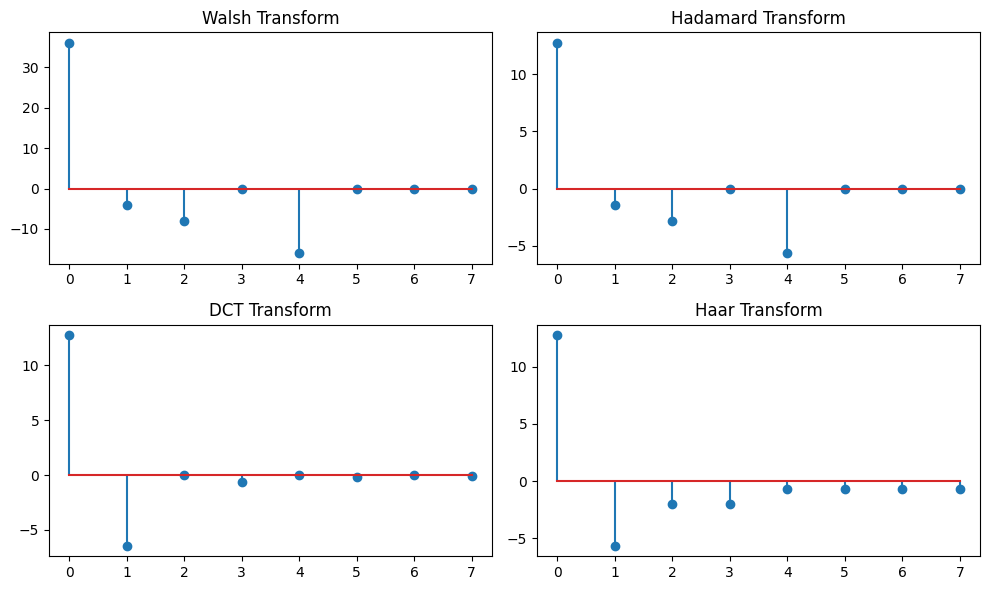

In [3]:
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt

# Walsh Transform
def walsh_transform(vector):
    N = len(vector)
    H = hadamard_matrix(N)
    return np.dot(H, vector)

# Hadamard Matrix
def hadamard_matrix(n):
    if n == 1:
        return np.array([[1]])
    H = hadamard_matrix(n // 2)
    return np.block([[H, H], [H, -H]])

# Hadamard Transform
def hadamard_transform(vector):
    N = len(vector)
    H = hadamard_matrix(N)
    return np.dot(H, vector) / np.sqrt(N)

# Discrete Cosine Transform (DCT)
def dct_transform(vector):
    return fft.dct(vector, norm='ortho')

# Haar Transform
def haar_transform(vector):
    N = len(vector)
    output = np.copy(vector).astype(float)
    temp = np.zeros_like(output)
    while N > 1:
        N //= 2
        for i in range(N):
            temp[i] = (output[2 * i] + output[2 * i + 1]) / np.sqrt(2)
            temp[N + i] = (output[2 * i] - output[2 * i + 1]) / np.sqrt(2)
        output[:2 * N] = temp[:2 * N]
    return output

# Sample Input Vector
vector = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)

# Compute Transforms
walsh_result = walsh_transform(vector)
hadamard_result = hadamard_transform(vector)
dct_result = dct_transform(vector)
haar_result = haar_transform(vector)

# Plot Results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.stem(walsh_result)
plt.title("Walsh Transform")

plt.subplot(2, 2, 2)
plt.stem(hadamard_result)
plt.title("Hadamard Transform")

plt.subplot(2, 2, 3)
plt.stem(dct_result)
plt.title("DCT Transform")

plt.subplot(2, 2, 4)
plt.stem(haar_result)
plt.title("Haar Transform")

plt.tight_layout()
plt.show()